In [60]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [61]:
# reading test and training data

train = pd.read_csv('..\\..\\Data\\titanic_train.csv')
test = pd.read_csv('..\\..\\Data\\titanic_test.csv')

In [62]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [63]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [64]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


<AxesSubplot:xlabel='Survived', ylabel='count'>

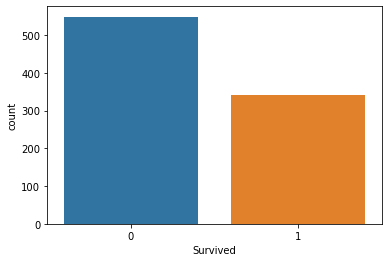

In [65]:
sns.countplot(x = 'Survived', data = train)

In [66]:
#saving test data index for writing final file

Final_Index = test['PassengerId']

<AxesSubplot:>

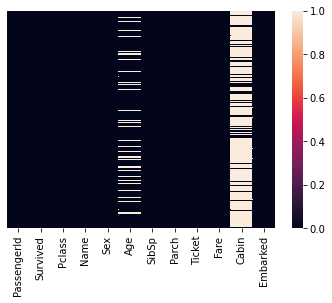

In [67]:
#checking for null values

sns.heatmap(train.isnull(),yticklabels = False)

In [68]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

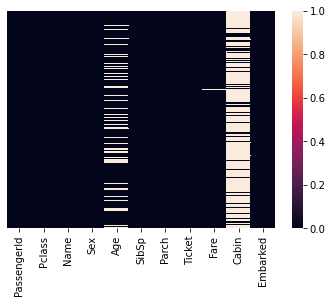

In [69]:
sns.heatmap(test.isnull(),yticklabels = False)

In [70]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Since there are a lof of missing values for 'Cabin', we will drop this column later. The next biggest attibute with missing values is 'Age', since there aren't a lot of missing values for this column we will look at the correlaton between different arributes and replace the missing values instead of dropping them.

In [71]:
train.corr()['Age']

PassengerId    0.036847
Survived      -0.077221
Pclass        -0.369226
Age            1.000000
SibSp         -0.308247
Parch         -0.189119
Fare           0.096067
Name: Age, dtype: float64

<AxesSubplot:xlabel='Age', ylabel='Count'>

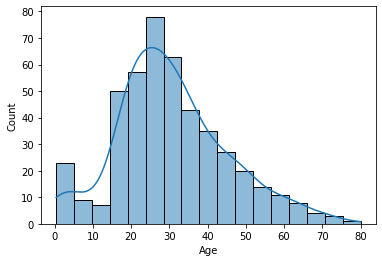

In [74]:
sns.histplot(train[train['Sex'] == 'male']['Age'], kde = True)

<AxesSubplot:xlabel='Age', ylabel='Count'>

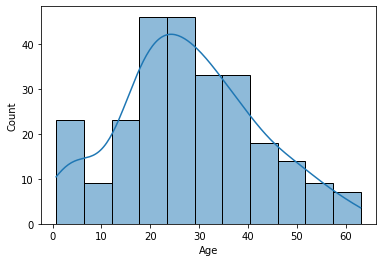

In [75]:
sns.histplot(train[train['Sex'] == 'female']['Age'], kde = True)

In [76]:
train.groupby('Sex').skew()['Age']

Sex
female    0.206097
male      0.475318
Name: Age, dtype: float64

In [77]:
print(train.groupby('Sex').mean()['Age'])
print(train.groupby('Sex').median()['Age'])

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64
Sex
female    27.0
male      29.0
Name: Age, dtype: float64


In [78]:
# We will use the mean to replace values for females and median for the mailes because the dist seems to be more skewed

def replace_age(df):
    sex = df[1]
    age = df[0]
    if pd.isnull(age):
        if sex == 'male': return 29
        else: return 28
    else: return age

In [79]:
#applying function to fill null values

train['Age'] = train[['Age','Sex']].apply(replace_age, axis = 1)
test['Age'] = test[['Age','Sex']].apply(replace_age, axis = 1)

In [80]:
print("Train data:\n",train.isnull().sum(),"\n\nTest Data")
print(test.isnull().sum())

Train data:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64 

Test Data
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [81]:
# check the Pclass of the missing fare value in test data
test[test['Fare'].isnull()]['Pclass']

152    3
Name: Pclass, dtype: int64

In [82]:
#finding average fare for null value

av_fare = test[test['Pclass'] == 3]['Fare'].mean()

In [83]:
test['Fare'].fillna(value = av_fare, inplace = True)

In [84]:
print(test.isnull().sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


In [85]:
 train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [86]:
#dropping unwaned columns that will not play a role for prediction

train.drop(['Cabin','PassengerId','Ticket','Name'], inplace = True, axis = 1)
test.drop(['Cabin','PassengerId','Ticket','Name'], inplace = True, axis = 1)

In [87]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [88]:
#get dummy values for important categorical data

sex = pd.get_dummies(train['Sex'], drop_first = True)
embark = pd.get_dummies(train['Embarked'], drop_first = True)
pclass = pd.get_dummies(train['Pclass'], drop_first = True)

In [89]:
#concatenate with original dataframe
train = pd.concat([train,sex,embark,pclass], axis = 1)

In [90]:
#do the same for test dataset

sex = pd.get_dummies(test['Sex'], drop_first = True)
embark = pd.get_dummies(test['Embarked'], drop_first = True)
pclass = pd.get_dummies(test['Pclass'], drop_first = True)

In [91]:
#concatenating with original dataframe
test = pd.concat([test,sex,embark,pclass], axis = 1)

In [92]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,male,Q,S,2,3
0,0,3,male,22.0,1,0,7.2500,S,1,0,1,0,1
1,1,1,female,38.0,1,0,71.2833,C,0,0,0,0,0
2,1,3,female,26.0,0,0,7.9250,S,0,0,1,0,1
3,1,1,female,35.0,1,0,53.1000,S,0,0,1,0,0
4,0,3,male,35.0,0,0,8.0500,S,1,0,1,0,1


In [93]:
#drop categorical columns

train.drop(['Pclass','Sex','Embarked'], inplace = True, axis = 1)
test.drop(['Pclass','Sex','Embarked'], inplace = True, axis = 1)

In [94]:
train.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


In [95]:
#dividing data into attributes and class labels

X_train = train.drop('Survived',axis = 1)
y_train = train['Survived']

X_test = test

Since we have 8 categorical attributes and 2 numerical attributes, let's try using the random forest classifier.

In [109]:
from sklearn.ensemble import RandomForestClassifier

In [110]:
# create an instance of the model because we will use cross validation for hyperparameter tuning
rfc = RandomForestClassifier()

In [149]:
# create a grid of parameters

n_estimators = [int(x) for x in np.linspace(start = 15, stop = 250, num = 150)]
max_features = [None, 'sqrt','log2']
min_samples_leaf = [1,3,5]
max_depth = [int(x) for x in np.linspace(3, 200, num = 60)]
max_depth.append(None)
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
                'max_features': max_features,
                'min_samples_leaf': min_samples_leaf,
                'max_depth': max_depth,
                'bootstrap': bootstrap}

print(random_grid)

{'n_estimators': [15, 16, 18, 19, 21, 22, 24, 26, 27, 29, 30, 32, 33, 35, 37, 38, 40, 41, 43, 44, 46, 48, 49, 51, 52, 54, 56, 57, 59, 60, 62, 63, 65, 67, 68, 70, 71, 73, 74, 76, 78, 79, 81, 82, 84, 85, 87, 89, 90, 92, 93, 95, 97, 98, 100, 101, 103, 104, 106, 108, 109, 111, 112, 114, 115, 117, 119, 120, 122, 123, 125, 126, 128, 130, 131, 133, 134, 136, 138, 139, 141, 142, 144, 145, 147, 149, 150, 152, 153, 155, 156, 158, 160, 161, 163, 164, 166, 167, 169, 171, 172, 174, 175, 177, 179, 180, 182, 183, 185, 186, 188, 190, 191, 193, 194, 196, 197, 199, 201, 202, 204, 205, 207, 208, 210, 212, 213, 215, 216, 218, 220, 221, 223, 224, 226, 227, 229, 231, 232, 234, 235, 237, 238, 240, 242, 243, 245, 246, 248, 250], 'max_features': [None, 'sqrt', 'log2'], 'min_samples_leaf': [1, 3, 5], 'max_depth': [3, 6, 9, 13, 16, 19, 23, 26, 29, 33, 36, 39, 43, 46, 49, 53, 56, 59, 63, 66, 69, 73, 76, 79, 83, 86, 89, 93, 96, 99, 103, 106, 109, 113, 116, 119, 123, 126, 129, 133, 136, 139, 143, 146, 149, 153, 156

In [150]:
# import libraries for cross validation

from sklearn.model_selection import RandomizedSearchCV

In [154]:
# begin cross validation, we will only try 50 fits in this case

rf_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 50,
                               cv = 5, verbose = 2)

rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] n_estimators=85, min_samples_leaf=3, max_features=sqrt, max_depth=109, bootstrap=True 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=85, min_samples_leaf=3, max_features=sqrt, max_depth=109, bootstrap=True, total=   0.2s
[CV] n_estimators=85, min_samples_leaf=3, max_features=sqrt, max_depth=109, bootstrap=True 
[CV]  n_estimators=85, min_samples_leaf=3, max_features=sqrt, max_depth=109, bootstrap=True, total=   0.2s
[CV] n_estimators=85, min_samples_leaf=3, max_features=sqrt, max_depth=109, bootstrap=True 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  n_estimators=85, min_samples_leaf=3, max_features=sqrt, max_depth=109, bootstrap=True, total=   0.2s
[CV] n_estimators=85, min_samples_leaf=3, max_features=sqrt, max_depth=109, bootstrap=True 
[CV]  n_estimators=85, min_samples_leaf=3, max_features=sqrt, max_depth=109, bootstrap=True, total=   0.1s
[CV] n_estimators=85, min_samples_leaf=3, max_features=sqrt, max_depth=109, bootstrap=True 
[CV]  n_estimators=85, min_samples_leaf=3, max_features=sqrt, max_depth=109, bootstrap=True, total=   0.1s
[CV] n_estimators=167, min_samples_leaf=3, max_features=sqrt, max_depth=63, bootstrap=False 
[CV]  n_estimators=167, min_samples_leaf=3, max_features=sqrt, max_depth=63, bootstrap=False, total=   0.2s
[CV] n_estimators=167, min_samples_leaf=3, max_features=sqrt, max_depth=63, bootstrap=False 
[CV]  n_estimators=167, min_samples_leaf=3, max_features=sqrt, max_depth=63, bootstrap=False, total=   0.3s
[CV] n_estimators=167, min_samples_leaf=3, max_features=sqrt, max_depth=63, bootstrap=False 


[CV]  n_estimators=243, min_samples_leaf=3, max_features=sqrt, max_depth=129, bootstrap=False, total=   0.4s
[CV] n_estimators=130, min_samples_leaf=5, max_features=log2, max_depth=3, bootstrap=False 
[CV]  n_estimators=130, min_samples_leaf=5, max_features=log2, max_depth=3, bootstrap=False, total=   0.1s
[CV] n_estimators=130, min_samples_leaf=5, max_features=log2, max_depth=3, bootstrap=False 
[CV]  n_estimators=130, min_samples_leaf=5, max_features=log2, max_depth=3, bootstrap=False, total=   0.2s
[CV] n_estimators=130, min_samples_leaf=5, max_features=log2, max_depth=3, bootstrap=False 
[CV]  n_estimators=130, min_samples_leaf=5, max_features=log2, max_depth=3, bootstrap=False, total=   0.1s
[CV] n_estimators=130, min_samples_leaf=5, max_features=log2, max_depth=3, bootstrap=False 
[CV]  n_estimators=130, min_samples_leaf=5, max_features=log2, max_depth=3, bootstrap=False, total=   0.2s
[CV] n_estimators=130, min_samples_leaf=5, max_features=log2, max_depth=3, bootstrap=False 
[CV

[CV]  n_estimators=231, min_samples_leaf=5, max_features=log2, max_depth=36, bootstrap=True, total=   0.5s
[CV] n_estimators=231, min_samples_leaf=5, max_features=log2, max_depth=36, bootstrap=True 
[CV]  n_estimators=231, min_samples_leaf=5, max_features=log2, max_depth=36, bootstrap=True, total=   0.4s
[CV] n_estimators=231, min_samples_leaf=5, max_features=log2, max_depth=36, bootstrap=True 
[CV]  n_estimators=231, min_samples_leaf=5, max_features=log2, max_depth=36, bootstrap=True, total=   0.4s
[CV] n_estimators=231, min_samples_leaf=5, max_features=log2, max_depth=36, bootstrap=True 
[CV]  n_estimators=231, min_samples_leaf=5, max_features=log2, max_depth=36, bootstrap=True, total=   0.4s
[CV] n_estimators=231, min_samples_leaf=5, max_features=log2, max_depth=36, bootstrap=True 
[CV]  n_estimators=231, min_samples_leaf=5, max_features=log2, max_depth=36, bootstrap=True, total=   0.4s
[CV] n_estimators=213, min_samples_leaf=1, max_features=sqrt, max_depth=73, bootstrap=True 
[CV] 

[CV]  n_estimators=15, min_samples_leaf=1, max_features=None, max_depth=193, bootstrap=True, total=   0.0s
[CV] n_estimators=70, min_samples_leaf=1, max_features=sqrt, max_depth=166, bootstrap=True 
[CV]  n_estimators=70, min_samples_leaf=1, max_features=sqrt, max_depth=166, bootstrap=True, total=   0.1s
[CV] n_estimators=70, min_samples_leaf=1, max_features=sqrt, max_depth=166, bootstrap=True 
[CV]  n_estimators=70, min_samples_leaf=1, max_features=sqrt, max_depth=166, bootstrap=True, total=   0.1s
[CV] n_estimators=70, min_samples_leaf=1, max_features=sqrt, max_depth=166, bootstrap=True 
[CV]  n_estimators=70, min_samples_leaf=1, max_features=sqrt, max_depth=166, bootstrap=True, total=   0.1s
[CV] n_estimators=70, min_samples_leaf=1, max_features=sqrt, max_depth=166, bootstrap=True 
[CV]  n_estimators=70, min_samples_leaf=1, max_features=sqrt, max_depth=166, bootstrap=True, total=   0.1s
[CV] n_estimators=70, min_samples_leaf=1, max_features=sqrt, max_depth=166, bootstrap=True 
[CV] 

[CV]  n_estimators=216, min_samples_leaf=5, max_features=log2, max_depth=86, bootstrap=True, total=   0.3s
[CV] n_estimators=216, min_samples_leaf=5, max_features=log2, max_depth=86, bootstrap=True 
[CV]  n_estimators=216, min_samples_leaf=5, max_features=log2, max_depth=86, bootstrap=True, total=   0.3s
[CV] n_estimators=216, min_samples_leaf=5, max_features=log2, max_depth=86, bootstrap=True 
[CV]  n_estimators=216, min_samples_leaf=5, max_features=log2, max_depth=86, bootstrap=True, total=   0.3s
[CV] n_estimators=216, min_samples_leaf=5, max_features=log2, max_depth=86, bootstrap=True 
[CV]  n_estimators=216, min_samples_leaf=5, max_features=log2, max_depth=86, bootstrap=True, total=   0.3s
[CV] n_estimators=216, min_samples_leaf=5, max_features=log2, max_depth=86, bootstrap=True 
[CV]  n_estimators=216, min_samples_leaf=5, max_features=log2, max_depth=86, bootstrap=True, total=   0.3s
[CV] n_estimators=169, min_samples_leaf=5, max_features=log2, max_depth=116, bootstrap=True 
[CV]

[CV]  n_estimators=145, min_samples_leaf=5, max_features=log2, max_depth=9, bootstrap=False, total=   0.2s
[CV] n_estimators=145, min_samples_leaf=5, max_features=log2, max_depth=9, bootstrap=False 
[CV]  n_estimators=145, min_samples_leaf=5, max_features=log2, max_depth=9, bootstrap=False, total=   0.2s
[CV] n_estimators=145, min_samples_leaf=5, max_features=log2, max_depth=9, bootstrap=False 
[CV]  n_estimators=145, min_samples_leaf=5, max_features=log2, max_depth=9, bootstrap=False, total=   0.2s
[CV] n_estimators=205, min_samples_leaf=1, max_features=log2, max_depth=96, bootstrap=True 
[CV]  n_estimators=205, min_samples_leaf=1, max_features=log2, max_depth=96, bootstrap=True, total=   0.3s
[CV] n_estimators=205, min_samples_leaf=1, max_features=log2, max_depth=96, bootstrap=True 
[CV]  n_estimators=205, min_samples_leaf=1, max_features=log2, max_depth=96, bootstrap=True, total=   0.3s
[CV] n_estimators=205, min_samples_leaf=1, max_features=log2, max_depth=96, bootstrap=True 
[CV] 

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:   56.3s finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=50,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [3, 6, 9, 13, 16, 19, 23,
                                                      26, 29, 33, 36, 39, 43,
                                                      46, 49, 53, 56, 59, 63,
                                                      66, 69, 73, 76, 79, 83,
                                                      86, 89, 93, 96, 99, ...],
                                        'max_features': [None, 'sqrt', 'log2'],
                                        'min_samples_leaf': [1, 3, 5],
                                        'n_estimators': [15, 16, 18, 19, 21, 22,
                                                         24, 26, 27, 29, 30, 32,
                                                         33, 35, 37, 38, 40, 41,
                                                         43, 44, 46, 48, 

In [155]:
# find the best set of parameters
rf_random.best_params_

{'n_estimators': 156,
 'min_samples_leaf': 3,
 'max_features': None,
 'max_depth': 66,
 'bootstrap': True}

In [156]:
# also check the best score
rf_random.best_score_

0.8373109032703534

In [157]:
params = rf_random.best_params_

In [158]:
# create the final model with best parameters

rfc_final = RandomForestClassifier(**params)

rfc_final.fit(X_train, y_train)

RandomForestClassifier(max_depth=66, max_features=None, min_samples_leaf=3,
                       n_estimators=156)

In [159]:
predictions = rfc_final.predict(test)

In [160]:
predictions

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [161]:
#reading csv file with correct classification

answers = pd.read_csv('..\\..\\Data\\gender_submission.csv')['Survived']

In [162]:
answers.head()

0    0
1    1
2    0
3    0
4    1
Name: Survived, dtype: int64

In [163]:
#creating prediction dataFrame

pred = pd.DataFrame(index = Final_Index, data = predictions)

In [164]:
from sklearn.metrics import classification_report

In [165]:
#printing classification report

print(classification_report(predictions,answers))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       276
           1       0.80      0.86      0.83       142

    accuracy                           0.88       418
   macro avg       0.86      0.88      0.87       418
weighted avg       0.88      0.88      0.88       418



In [166]:
from sklearn.metrics import confusion_matrix

In [167]:
print(confusion_matrix(predictions,answers))

[[246  30]
 [ 20 122]]


In [168]:
# Clearly the logictic regression model does a better job!